# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://github.com/DonBraulio/introCD).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [1]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

## Lectura de Datos

In [2]:
# Conecto con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#path="../data"
#path = "/content/drive/Shared drives"
#path = "/content/drive/My Drive/data"

path = "/content/drive/My Drive/Maestría/IntroDC/data"


In [4]:
# DataFrame con todas las obras:
df_works = pd.read_csv(path+'/shakespeare/works.csv')

# Todos los párrafos de todas las obras
df_paragraphs = pd.read_csv(path+'/shakespeare/paragraphs.csv')

# Todos los párrafos de todas las obras
df_characters = pd.read_csv(path+'/shakespeare/characters.csv')

# Todos los párrafos de todas las obras
df_chapters = pd.read_csv(path+'/shakespeare/chapters.csv')

## Exploración de Datos

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Veamos las obras incluídas:
df_works

,Unnamed: 0,id,Title,LongTitle,Date,GenreType
0,0,1,Twelfth Night,"Twelfth Night, Or What You Will",1599,Comedy
1,1,2,All's Well That Ends Well,All's Well That Ends Well,1602,Comedy
2,2,3,Antony and Cleopatra,Antony and Cleopatra,1606,Tragedy
3,3,4,As You Like It,As You Like It,1599,Comedy
4,4,5,Comedy of Errors,The Comedy of Errors,1589,Comedy
5,5,6,Coriolanus,Coriolanus,1607,Tragedy
6,6,7,Cymbeline,"Cymbeline, King of Britain",1609,History
7,7,8,Hamlet,"Tragedy of Hamlet, Prince of Denmark, The",1600,Tragedy
8,8,9,"Henry IV, Part I","History of Henry IV, Part I",1597,History
9,9,10,"Henry IV, Part II","History of Henry IV, Part II",1597,History


## Limpieza de Texto y Conteo de Palabras

In [7]:
def clean_text(df, column_name):
    # Convertir todo a minúsculas
    result = df[column_name].str.lower()

    # Quitar signos de puntuación y cambiarlos por espacios (" ")
    # TODO: completar signos de puntuación faltantes
    for punc in ["[", "\n", ",", ";", ".", "]", "?", ":", "!", "'", "-", "(", ")", "&", "\"", "\t"]:
        result = result.str.replace(punc, " ")
    return result

# Creamos una nueva columna CleanText a partir de PlainText
df_paragraphs["CleanText"] = clean_text(df_paragraphs, "PlainText")

# Veamos la diferencia
df_paragraphs[["PlainText", "CleanText"]]

,PlainText,CleanText
0,"[Enter DUKE ORSINO, CURIO, and other Lords; Mu...",enter duke orsino curio and other lords mu...
1,"If music be the food of love, play on;\nGive m...",if music be the food of love play on give me...
2,"Will you go hunt, my lord?",will you go hunt my lord
3,"What, Curio?",what curio
4,The hart.,the hart
...,...,...
35460,"That she is living,\nWere it but told you, sho...",that she is living were it but told you shou...
35461,"You gods, look down\nAnd from your sacred vial...",you gods look down and from your sacred vials...
35462,There's time enough for that;\nLest they desir...,there s time enough for that lest they desire...
35463,"O, peace, Paulina!\nThou shouldst a husband ta...",o peace paulina thou shouldst a husband tak...


In [8]:

# Si encuentro un caracter con algo diferente a alfanumerico, lo muestro
# Warning: tarda mucho

'''
for x in df_paragraphs["CleanText"]:
    for char in x:
        if char != ' ' and not char.isalnum():
            print(f"The character '{char}' is not alphanumeric, ascii {ord(char)}.")
'''

'\nfor x in df_paragraphs["CleanText"]:\n    for char in x:\n        if char != \' \' and not char.isalnum():\n            print(f"The character \'{char}\' is not alphanumeric, ascii {ord(char)}.")\n'

In [9]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_paragraphs["WordList"] = df_paragraphs["CleanText"].str.split()

# Veamos la nueva columna creada
# Notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_paragraphs[["CleanText", "WordList"]]

,CleanText,WordList
0,enter duke orsino curio and other lords mu...,"[enter, duke, orsino, curio, and, other, lords..."
1,if music be the food of love play on give me...,"[if, music, be, the, food, of, love, play, on,..."
2,will you go hunt my lord,"[will, you, go, hunt, my, lord]"
3,what curio,"[what, curio]"
4,the hart,"[the, hart]"
...,...,...
35460,that she is living were it but told you shou...,"[that, she, is, living, were, it, but, told, y..."
35461,you gods look down and from your sacred vials...,"[you, gods, look, down, and, from, your, sacre..."
35462,there s time enough for that lest they desire...,"[there, s, time, enough, for, that, lest, they..."
35463,o peace paulina thou shouldst a husband tak...,"[o, peace, paulina, thou, shouldst, a, husband..."


In [10]:
# Nuevo dataframe: cada fila ya no es un párrafo, sino una sóla palabra
df_words = df_paragraphs.explode("WordList")

# Quitamos estas columnas redundantes
df_words.drop(columns=["CleanText", "PlainText"], inplace=True)

# Renombramos la columna WordList -> word
df_words.rename(columns={"WordList": "word"}, inplace=True)

# Verificar que el número de filas es mucho mayor
df_words

# Nota: El id en df_words es el id del párrafo.

,Unnamed: 0,id,ParagraphNum,character_id,chapter_id,word
0,0,630863,3,1261,18704,enter
0,0,630863,3,1261,18704,duke
0,0,630863,3,1261,18704,orsino
0,0,630863,3,1261,18704,curio
0,0,630863,3,1261,18704,and
...,...,...,...,...,...,...
35463,35463,666326,3483,667,19648,d
35463,35463,666326,3483,667,19648,hastily
35463,35463,666326,3483,667,19648,lead
35463,35463,666326,3483,667,19648,away


 ## Personajes con mayor cantidad de palabras

In [11]:
# Agregamos el nombre de los personajes
df_words = pd.merge(df_words, df_characters[["id", "CharName"]], left_on="character_id", right_on="id")
df_words.rename(columns={"id_x": 'id_paragraph', "id_y": "id_character"}, inplace=True)


In [12]:
words_per_character = df_words.groupby("CharName")["word"].count().sort_values(ascending=False)
words_per_character


CharName
Poet                  50762
(stage directions)    16443
Henry V               15428
Falstaff              14906
Hamlet                12291
                      ...  
Philip                    3
Nicholas                  2
Joseph                    2
Taurus                    2
Thieves                   1
Name: word, Length: 925, dtype: int64

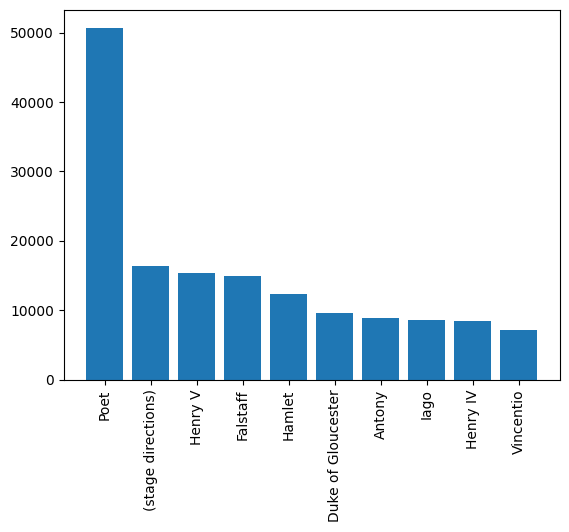

In [13]:
# Ejemplo: 10 personajes con más palabras
char_show = words_per_character[:10]
plt.bar(char_show.index, char_show.values)
_ = plt.xticks(rotation=90)

In [ ]:

## En esta celda podemos ver dado un personaje cuántas palabras posee en cada obra.

# Queremos ver en qué trabajos aparece Poet
#character = "Poet"
#character = "Henry V"
character = "Falstaff"

# Agregamos work_id, work_title, GenreType, Date
df_words_all = pd.merge(df_words, df_chapters[['id', 'work_id']], left_on='chapter_id', right_on='id')
df_words_all.rename(columns={"id": 'chapter_id'}, inplace=True)
df_words_all = pd.merge(df_words_all, df_works[['id', 'Title', 'GenreType', 'Date']], left_on='work_id', right_on='id')
df_words_all.drop(columns=["id"], inplace=True)

# Mostramos trabajos del personaje
words_poet = df_words_all[ df_words_all['CharName'] == character].groupby("Title")["word"].count().sort_values(ascending=False)
words_poet



Title
Henry IV, Part I          5726
Henry IV, Part II         5372
Merry Wives of Windsor    3808
Name: word, dtype: int64

In [ ]:

## Mostramos para una obra la cantidad de personajes que aparece.

# Descomentar para ver cantidad de personajes por trabajo
df_words_all[["Title", "CharName"]].drop_duplicates().groupby("Title").count().sort_values("CharName")

# Encontre los que tienen solo un personaje, todos de Poet
#df_words_all[ df_words_all['Title'] == 'Sonnets'].groupby("CharName")["word"].count().sort_values(ascending=False)
#df_words_all[ df_words_all['Title'] == 'Rape of Lucrece'].groupby("CharName")["word"].count().sort_values(ascending=False)
#df_words_all[ df_words_all['Title'] == 'Venus and Adonis'].groupby("CharName")["word"].count().sort_values(ascending=False)
#df_words_all[ df_words_all['Title'] == 'Passionate Pilgrim'].groupby("CharName")["word"].count().sort_values(ascending=False)
#df_words_all[ df_words_all['Title'] == "Lover's Complaint"].groupby("CharName")["word"].count().sort_values(ascending=False)
#df_words_all[ df_words_all['Title'] == "Phoenix and the Turtle"].groupby("CharName")["word"].count().sort_values(ascending=False)

# Ejemplo de trabajo que tiene muchos personajes
df_words_all[ df_words_all['Title'] == "Timon of Athens"].groupby("CharName")["word"].count().sort_values(ascending=False)



CharName
Timon                 6669
Apemantus             1846
Flavius               1575
Alcibiades            1218
Poet                   741
First Senator          582
Painter                477
Second Senator         431
(stage directions)     418
Lucilius               386
First Lord             326
Lucullus               296
Second Lord            290
Senator                286
First Stranger         238
Servant                226
Flaminius              221
Sempronius             220
Old Athenian           208
Fool                   183
Servilius              154
Caphis                 138
Soldier                126
Messenger              122
Second Servant         122
Hortensius             108
Titus                   95
First Servant           93
First Bandit            90
Third Lord              79
Philotus                78
Third Servant           76
Merchant                65
Ventidius               61
Jeweller                57
Page                    52
Cupid              

## Párrafos por personaje

In [15]:
paragraphs_by_character = df_words[["id_paragraph", "CharName"]].drop_duplicates().groupby("CharName").count().sort_values("id_paragraph", ascending=False)
paragraphs_by_character


,id_paragraph
CharName,
(stage directions),3751
Poet,766
Falstaff,471
Henry V,377
Hamlet,358
...,...
Third Apparition,1
Thieves,1
First Apparition,1


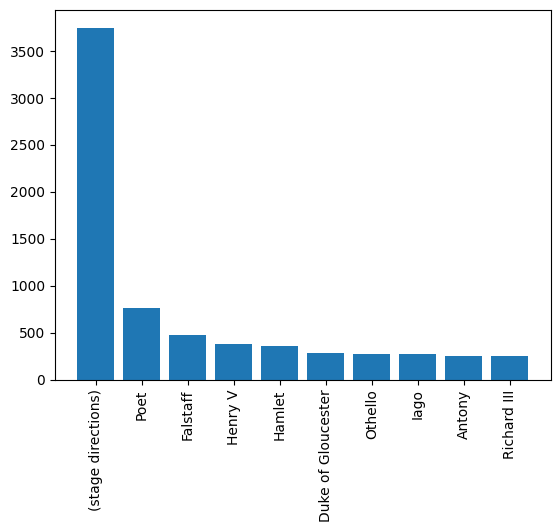

In [17]:
char_show = paragraphs_by_character[:10]
plt.bar(char_show.index, char_show.id_paragraph)
_ = plt.xticks(rotation=90)

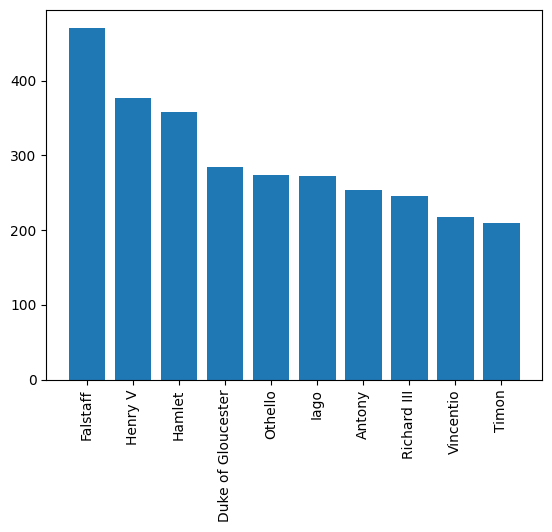

In [21]:

# Quitando a (stage directions) y Poet
char_show = paragraphs_by_character[ (paragraphs_by_character.index != '(stage directions)') & (paragraphs_by_character.index != 'Poet') ]  [:10]
plt.bar(char_show.index, char_show.id_paragraph)
_ = plt.xticks(rotation=90)


## Obras durante el tiempo: tendencia en género, cantidad de obras, etc.

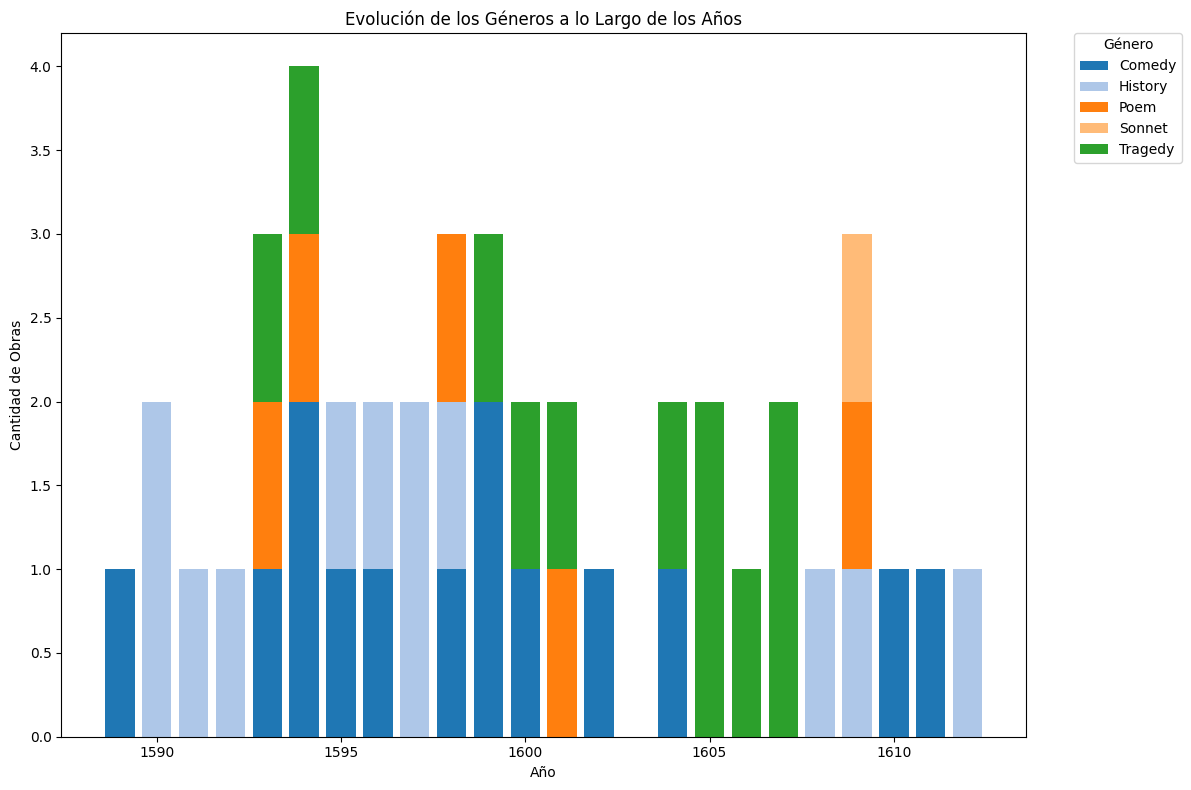

In [ ]:

# Contar la cantidad de títulos por género y año
genre_year_count = df_words_all[["Date", "GenreType", "Title"]].drop_duplicates()

genre_year_count = genre_year_count.groupby(['Date', 'GenreType'])['Title'].count().unstack().fillna(0)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear una lista de colores para los géneros
colors = plt.cm.tab20.colors  # Usar un colormap con suficientes colores

# Crear las barras apiladas
bottom = None
for i, genre in enumerate(genre_year_count.columns):
    if bottom is None:
        bottom = genre_year_count[genre]
        ax.bar(genre_year_count.index, genre_year_count[genre], label=genre, color=colors[i % len(colors)])
    else:
        ax.bar(genre_year_count.index, genre_year_count[genre], bottom=bottom, label=genre, color=colors[i % len(colors)])
        bottom += genre_year_count[genre]

# Añadir etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Obras')
ax.set_title('Evolución de los Géneros a lo Largo de los Años')

# Añadir leyenda y ajustarla
ax.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


## Palabras más frecuentes

In [ ]:

# Cada documento es un párrafo.
# Obtenemos una lista de documentos
documents = df_paragraphs[ df_paragraphs['character_id'] != 1261 ][['CleanText']].CleanText.to_list()
documents = [ " "+d+" " for d in documents]

replacements = {
    # Cambiamos las palabras del inglés anitguo por palabras modernas.
    " thou ": " you ",
    " thee ": " you ",
    " thy ": " your ",
    " thine ": " your ",
    " thyself ": " yourself ",
    # Quitamos palabras de títulos honoríficos y verbos auxiliares.
    " sir ": " ",
    " lord ": " ",
    " would ": " ",
    " shall ": " ",
    " ll ": " ",
    " did ": " ",
    " like ": " ",
    " tis ": " ",
    " hath ": " ",
}

for old_word, new_word in replacements.items():
    _documents = []
    for d in documents:
        _documents.append( d.replace(old_word, new_word) )
    documents = _documents

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


good: 2910
come: 2588
let: 2441
love: 2358
well: 2335
man: 2021
one: 1901
upon: 1829
know: 1811
say: 1779
go: 1767
make: 1737
may: 1736
yet: 1687
us: 1685
king: 1581
must: 1563
see: 1534
give: 1401
take: 1249


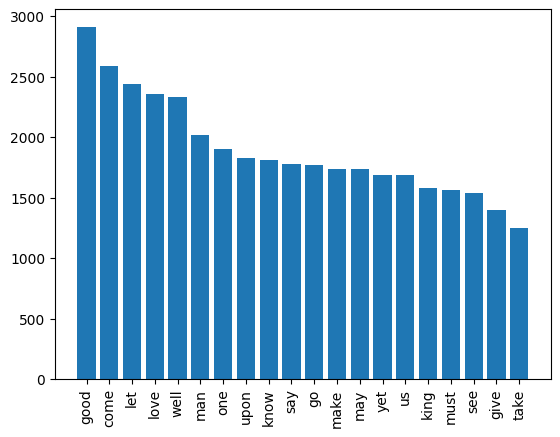

In [ ]:

# Calculamos las palabras más frecuente utilizando nltk.
# Se quitan las stop word del inglés (palabras muy usadas)

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

def calculate_word_frequencies(documents):
    all_words = []
    for document in documents:
        words = preprocess_text(document)
        all_words.extend(words)
    word_counts = Counter(all_words)
    return word_counts

def get_most_frequent_words(word_counts, n=10):
    return word_counts.most_common(n)


# Calculate word frequencies
word_counts = calculate_word_frequencies(documents)

# Get the 20 most frequent words
most_frequent_words = get_most_frequent_words(word_counts, n=20)
words_plot = [ w[0] for w in most_frequent_words ]
freq_plot = [ w[1] for w in most_frequent_words ]

# Print the most frequent words
plt.bar(words_plot, freq_plot)
_ = plt.xticks(rotation=90)

for word, freq in most_frequent_words:
    print(f'{word}: {freq}')


good: 528.7284
come: 445.9449
let: 381.7324
know: 365.3635
say: 359.4811
love: 339.6788
man: 330.0342
ay: 285.5051
speak: 262.8419
king: 260.9857
make: 236.7092
think: 232.4720
hear: 222.3219
tell: 221.7281
pray: 212.0021
madam: 208.9071
father: 194.3059
master: 194.1056
god: 190.0201
heart: 182.1906


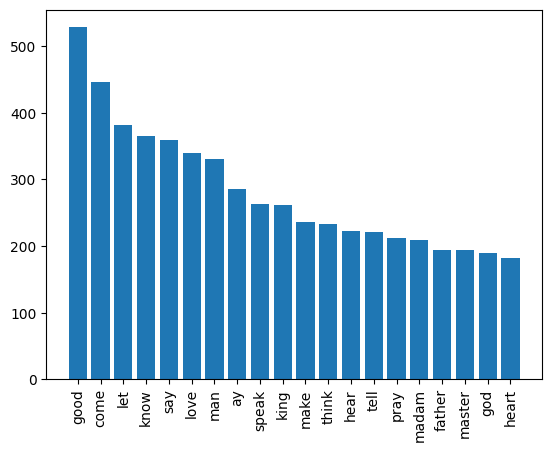

In [ ]:

# En este caso utilizamos el algoritmo tf-idf para calcular las palabras más
# importantes.

from sklearn.feature_extraction.text import TfidfVectorizer

# Caluclamos tf-idf
vectorizer = TfidfVectorizer(
    #max_df=0.5,
    #min_df=5,
    stop_words="english",
)
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF scores for each word across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a dictionary of words and their corresponding TF-IDF scores
word_tfidf = dict(zip(feature_names, tfidf_scores))

# Sort the dictionary by TF-IDF scores in descending order
sorted_word_tfidf = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)

# Get the top N words with the highest TF-IDF scores
top_n = 20
most_frequent_words = sorted_word_tfidf[:top_n]
words_plot = [ w[0] for w in most_frequent_words ]
freq_plot = [ w[1] for w in most_frequent_words ]

# Print the most frequent words
plt.bar(words_plot, freq_plot)
_ = plt.xticks(rotation=90)

# Print the most frequent words
for word, score in most_frequent_words:
    print(f'{word}: {score:.4f}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


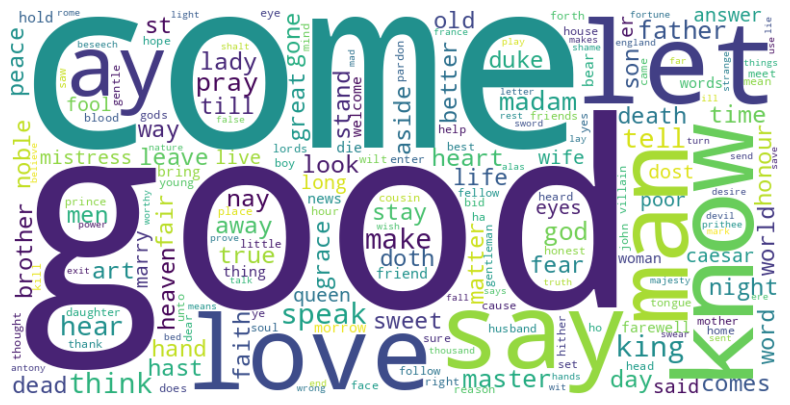

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK stopwords (only need to run once)
nltk.download('stopwords')

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF scores for each word across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a dictionary of words and their corresponding TF-IDF scores
word_tfidf = dict(zip(feature_names, tfidf_scores))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import textwrap

# Mostramos oraciones donde aparecen las palabras raras, tal vez inglés antiguo.

documents = df_paragraphs[ df_paragraphs['character_id'] != 1261 ][['CleanText']].CleanText.to_list()

word = " ll "

def print_limited_length_lines(text, max_length):
    wrapped_text = textwrap.fill(text, width=max_length)
    print(wrapped_text)

for d in documents:
    if word in d:
        print_limited_length_lines( d.replace(word, word.upper()), 80 )
        print()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
i LL be supposed upon a book  his face is the worst thing about him  good  then
if his face be the worst thing about him  how could master froth do the
constable s wife any harm  i would know that of your honour

o thou caitiff  o thou varlet  o thou wicked hannibal  i respected with her
before i was married to her  if ever i was respected with her  or she with me
let not your worship think me the poor duke s officer  prove this  thou wicked
hannibal  or i LL have mine action of battery on thee

if you head and hang all that offend that way but for ten year together  you LL
be glad to give out a commission for more heads  if this law hold in vienna ten
year  i LL rent the fairest house in it after three pence a bay  if you live to
see this come to pass  say pompey told you so

he s hearing of a cause  he will come straight i LL tell him of you

pray you  do   exit servant  i LL know his pleasure  may be he will relent  